In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

# CorInfoMax

# CSM

In [2]:
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_FashionMNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [3]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.83945, 0.8702166666666666, 0.87578333333333...","[0.8243, 0.8532, 0.8575, 0.8613, 0.863, 0.8687...",0.960750,0.8916
1,1,10,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.8421833333333333, 0.8707833333333334, 0.872...","[0.8309, 0.8549, 0.857, 0.8558, 0.856, 0.8693,...",0.942183,0.8792
2,1,20,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.8411833333333333, 0.86875, 0.87948333333333...","[0.8226, 0.8529, 0.8605, 0.8423, 0.8608, 0.871...",0.950783,0.8810
3,1,30,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.8450166666666666, 0.86375, 0.88093333333333...","[0.8334, 0.8512, 0.8619, 0.8561, 0.8697, 0.839...",0.961033,0.8857
4,1,40,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.849, 0.8490166666666666, 0.8790833333333333...","[0.8326, 0.8313, 0.856, 0.8572, 0.8715, 0.8728...",0.961433,0.8910
5,1,50,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.82235, 0.8721666666666666, 0.87458333333333...","[0.814, 0.8557, 0.8564, 0.8534, 0.857, 0.8596,...",0.957367,0.8888
6,1,60,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.8306833333333333, 0.8662333333333333, 0.871...","[0.8156, 0.8492, 0.8528, 0.8638, 0.8455, 0.868...",0.958667,0.8873
7,1,70,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.8354166666666667, 0.8591666666666666, 0.876...","[0.8234, 0.8375, 0.8557, 0.8626, 0.8651, 0.863...",0.955000,0.8872
8,1,80,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.8499666666666666, 0.8662, 0.870283333333333...","[0.8345, 0.8458, 0.8484, 0.8612, 0.8669, 0.859...",0.961317,0.8890
9,1,90,CSM,"{'alphas_W': [0.15, 0.1], 'alphas_M': [-0.005]...","[0.8531333333333333, 0.87005, 0.87883333333333...","[0.8427, 0.8495, 0.8608, 0.8604, 0.8588, 0.862...",0.959050,0.8850


In [4]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.956758,0.88658


In [5]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


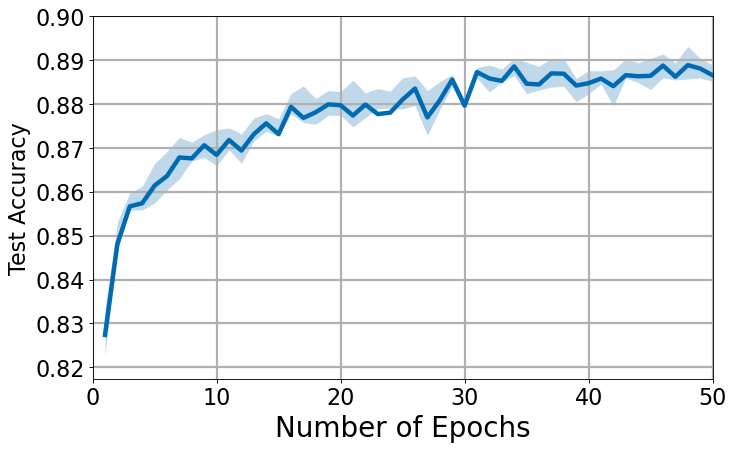

In [6]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# EP

In [7]:
df_results = pd.read_pickle(r"../Results/simulation_results_EP_FashionMNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [8]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8478166666666667, 0.8621666666666666, 0.879...","[0.8343, 0.8435, 0.8603, 0.8408, 0.8664, 0.854...",0.942483,0.8792
1,1,10,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8427, 0.8701, 0.87095, 0.8838666666666667, ...","[0.8285, 0.8535, 0.849, 0.8621, 0.8563, 0.8657...",0.944200,0.8861
2,1,20,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8571333333333333, 0.8622166666666666, 0.883...","[0.843, 0.8467, 0.8636, 0.853, 0.8567, 0.8634,...",0.945367,0.8854
3,1,30,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8452166666666666, 0.8613166666666666, 0.879...","[0.8325, 0.8448, 0.8625, 0.8377, 0.8593, 0.852...",0.930267,0.8689
4,1,40,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8511, 0.8641166666666666, 0.867433333333333...","[0.8361, 0.8492, 0.8473, 0.8579, 0.8602, 0.868...",0.915250,0.8611
5,1,50,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8499, 0.8563333333333333, 0.86625, 0.873616...","[0.835, 0.8403, 0.8471, 0.852, 0.8636, 0.8681,...",0.946617,0.8844
6,1,60,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8459333333333333, 0.87145, 0.87036666666666...","[0.8351, 0.8538, 0.8496, 0.841, 0.8434, 0.8675...",0.941617,0.8768
7,1,70,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8495666666666667, 0.84615, 0.87355, 0.88081...","[0.8365, 0.8363, 0.8506, 0.8641, 0.8696, 0.861...",0.914650,0.8591
8,1,80,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8570666666666666, 0.8598666666666667, 0.872...","[0.8411, 0.8419, 0.8528, 0.8654, 0.8595, 0.87,...",0.932733,0.8763
9,1,90,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8546666666666667, 0.8646666666666667, 0.880...","[0.8408, 0.8483, 0.861, 0.8497, 0.8622, 0.8703...",0.942633,0.8837


In [9]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.935582,0.876100
1,2,0.943717,0.883533


In [10]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

2.0

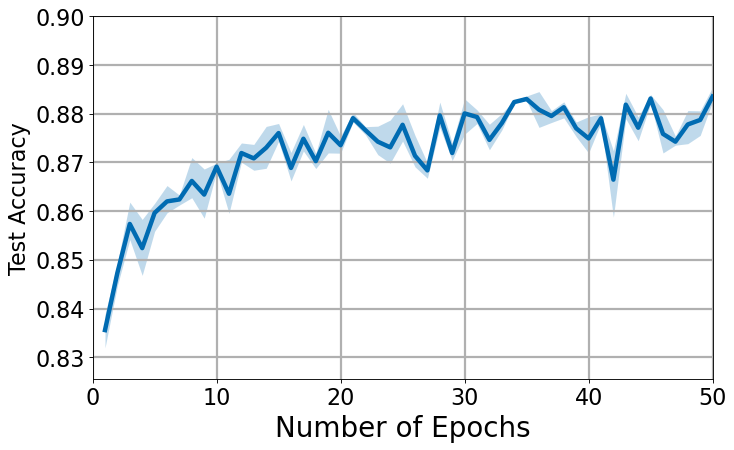

In [11]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# EP-Continual-Weight-Update

# PC

In [12]:
df_results = pd.read_pickle(r"../Results/simulation_results_PC_FashionMNIST.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [13]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8602666666666666, 0.87755, 0.89028333333333...","[0.8465, 0.8613, 0.8719, 0.8738, 0.8736, 0.878...",0.868717,0.8326
1,1,10,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8643, 0.8769, 0.8866333333333334, 0.8957833...","[0.8496, 0.8573, 0.8634, 0.8694, 0.8726, 0.878...",0.876783,0.8451
2,1,20,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8606166666666667, 0.8673833333333333, 0.887...","[0.846, 0.8503, 0.8663, 0.8696, 0.8769, 0.8719...",0.886800,0.8525
3,1,30,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8553, 0.8804833333333333, 0.89065, 0.898, 0...","[0.8396, 0.8666, 0.8694, 0.8733, 0.8699, 0.879...",0.869617,0.8414
4,1,40,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8582, 0.8801833333333333, 0.882333333333333...","[0.8462, 0.8639, 0.8594, 0.8737, 0.8754, 0.873...",0.874450,0.8404
5,1,50,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.85225, 0.8766, 0.8901333333333333, 0.885116...","[0.8362, 0.8591, 0.8687, 0.8611, 0.8787, 0.875...",0.886200,0.8517
6,1,60,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8589833333333333, 0.8816166666666667, 0.889...","[0.8475, 0.864, 0.8693, 0.8752, 0.8768, 0.8785...",0.891800,0.8550
7,1,70,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8608, 0.8767333333333334, 0.885166666666666...","[0.844, 0.8581, 0.8648, 0.8754, 0.8688, 0.8574...",0.884967,0.8524
8,1,80,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8652166666666666, 0.8790166666666667, 0.888...","[0.8492, 0.862, 0.8647, 0.8719, 0.847, 0.8778,...",0.887483,0.8562
9,1,90,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8564833333333334, 0.87545, 0.8889, 0.894933...","[0.8436, 0.8581, 0.8653, 0.8684, 0.8661, 0.867...",0.890350,0.8551


In [14]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.881717,0.84824
1,2,0.914528,0.86851
2,3,0.929618,0.88274


In [15]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting 

3.0

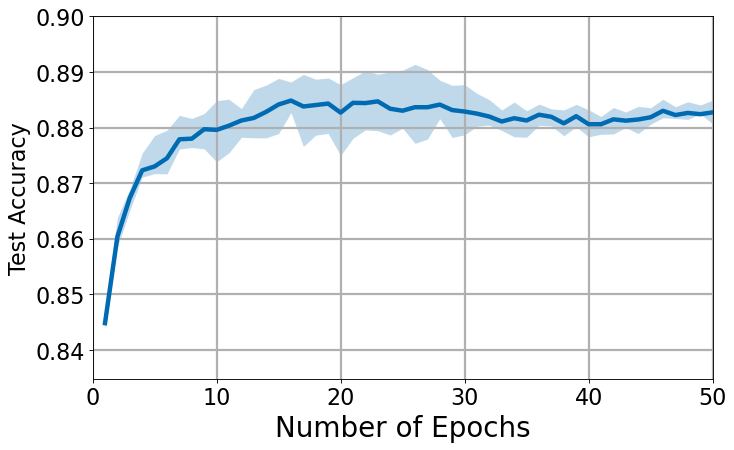

In [16]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# PC-Nudge

In [17]:
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_FashionMNIST_V2.pkl")
df_results.columns

Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [18]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8411166666666666, 0.8611, 0.860033333333333...","[0.8311, 0.8488, 0.8465, 0.8624, 0.8516, 0.863...",0.93280,0.8867
1,1,10,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8419833333333333, 0.8620833333333333, 0.865...","[0.8323, 0.8486, 0.8519, 0.8617, 0.8639, 0.866...",0.93545,0.8883


In [19]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.934125,0.8875


In [20]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

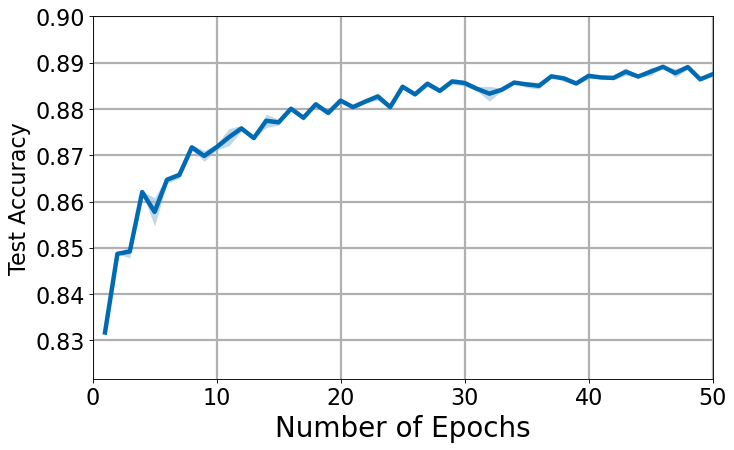

In [21]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# Altogether